In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize 
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense


from tcn import TCN

# Inverting representations

This section introduces the computation of an approximate
inverse of a time series representation. This is formulated
as the problem of finding a time series whose representation
best matches the one given.

## I/ Representation to be inverted

### 1/ The original time-serie

In [6]:
df = pd.read_csv('all_stocks_5yr.csv', delimiter=',', usecols=['date', 'close', "Name"])
df_AAPL = df.query("Name == 'AAPL'")
df_AAPL.head()

,date,close,Name
1259,2013-02-08,67.8542,AAPL
1260,2013-02-11,68.5614,AAPL
1261,2013-02-12,66.8428,AAPL
1262,2013-02-13,66.7156,AAPL
1263,2013-02-14,66.6556,AAPL


In [7]:
pd.options.plotting.backend = "plotly"
df_AAPL.plot(x='date', y='close')

In [9]:
close_aapl = df_AAPL['close'].values
lookback_window = 12

### 2/ The representation (TCN)

In [10]:
import tensorflow as tf

In [11]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)
model = Model(inputs=[i], outputs=[m])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
tcn (TCN)                    (None, 64)                136256    
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________


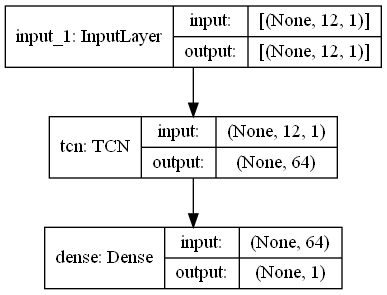

In [12]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

### 3/ Loss function

In [ ]:
def loss(preds, target):
    mse = tf.keras.losses.MeanSquaredError()
    return mse(target, preds).numpy()

### 4/ Regulariser

In [ ]:
def regulariser(x):
    return np.linalg.norm(x, 6)

## II/ Optimisation